# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from vector_package import get_vecs #get_vec to get the embedding vector for the word

In [2]:
def compute_pca(data, n_components=2):
    data_mean = data-np.mean(data, axis=None) #mean normalizing the data
    
    data_cov = np.cov(data_mean, rowvar=False) #calculating covariance matrix for the data
    
    eigen_vals, eigen_vecs = np.linalg.eigh(data_cov, UPLO='L') #calculating eigen values and eigen vector from covariance matrix
    
    idx_sorted = np.argsort(eigen_vals) #sort eigen values in increasing order (get the indices)
    
    idx_sorted_decreasing = idx_sorted[::-1] #changing the order to decreasing order
    
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing] #sorting the eigen values by decreasing order
    
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing] # sorting eigen vectors by decreasing order
    
    eigen_vec_subset = eigen_vecs_sorted[:,0:n_components] #choosing first n vectors
    
    data_reduced = np.dot(eigen_vec_subset.transpose(), data_mean.transpose()).transpose() #(X'U')'
    
    return data_reduced

In [3]:
np.random.seed(1) # providing a random seed
X = np.random.rand(3,10) #3x10 matrix with random values
X

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
        1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
        3.96767474e-01, 5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01, 2.04452250e-01, 8.78117436e-01,
        2.73875932e-02, 6.70467510e-01, 4.17304802e-01, 5.58689828e-01,
        1.40386939e-01, 1.98101489e-01],
       [8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01,
        8.76389152e-01, 8.94606664e-01, 8.50442114e-02, 3.90547832e-02,
        1.69830420e-01, 8.78142503e-01]])

In [4]:
X_reduced = compute_pca(X, n_components=2) #computing PCA where n=2

In [5]:
X_reduced #reduced matrix

array([[ 0.23132424,  0.43767745],
       [ 0.2177235 , -0.56404087],
       [-1.0581947 , -0.05521575]])

# PCA to words

In [6]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful'] #test list

In [7]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb")) #loading word embeddings using pickle

In [8]:
X = get_vecs(word_embeddings, words) #using get_vecs to convert our test list into embedding vectors

In [9]:
X_pca = compute_pca(X, 2) #PCA with components=2 to get the reduced vectors

In [10]:
X_pca #reduced vector

array([[ 2.27769765,  0.20897011],
       [ 2.04779042,  0.02097415],
       [-0.81606362,  1.2512863 ],
       [-0.97212037,  1.74316923],
       [-0.39811297, -1.11083617],
       [-0.65214463, -1.31375708],
       [-0.78685878, -1.62981695],
       [-0.11435355, -0.43292907],
       [-0.00702663, -0.59352059],
       [ 2.51725106,  0.28024023],
       [-0.85572345,  1.38267428]])

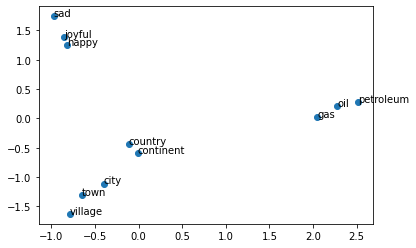

In [11]:
plt.scatter(X_pca[:,0], X_pca[:,1]) #scatterplot with the two dimensions
for i, word in enumerate(words): #for iteration in words
    plt.annotate(word, xy=(X_pca[i,0], X_pca[i,1])) #notation names for dots
    
plt.show()